In [1]:
# Install yfinance using pip
!pip install yfinance

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-01  169.799698  423.805573  170.029999  424.570007  171.250000   
2024-04-02  168.611298  420.681213  168.839996  421.440002  169.339996   
2024-04-03  169.420197  419.692993  169.649994  420.450012  170.679993   
2024-04-04  168.591339  417.127625  168.820007  417.880005  171.919998   
2024-04-05  169.350296  424.753845  169.580002  425.519989  170.389999   

Price                          Low                    Open              \
Ticker            MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-04-01  427.890015  169.479996  422.220001  171.190002  423.950012   
2024-04-02  422.380005  168.229996  417.839996  169.080002  420.109985   
2024-04-03  423.260010  168.580002  419.089996  168.789993  419.730011   
2024-04-04  428.670013  168.820007  417.570007  170.289993  424.989990   
2024-04-05  426.510010  168.949997  418.320007  169.589996  420.010010   

Price         Volume            
Ticker          AAPL      MSFT  
Date                            
2024-04-01  46240500  16316000  
2024-04-02  49329500  17912000  
2024-04-03  47691700  16502300  
2024-04-04  53704400  19370900  
2024-04-05  42055200  16544300

In [ ]:
!pip install pandas_datareader

In [860]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for S&P 500
stock_ticker = 'SPY'

# Download historical data for S&P 500 since 1980
stock_data = yf.download(stock_ticker, start='1980-01-01', end='2024-01-01')['Adj Close']

# Download historical data for 10-Year Treasury Bond from FRED
bond_data = web.DataReader('DGS10', 'fred', start='1980-01-01', end='2024-01-01')



[*********************100%%**********************]  1 of 1 completed


In [866]:
# Resample bond data to match the frequency of stock data (daily) and forward fill missing values
#bond_data = bond_data.resample('D').ffill()

# Calculate the daily returns for both stock and bond data
stock_returns = stock_data.pct_change().dropna()
bond_returns = bond_data.pct_change().dropna()



C:\Users\cramk\AppData\Local\Temp\ipykernel_21172\1504623157.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  bond_returns = bond_data.pct_change().dropna()


In [867]:
returns

,SP500,10Y_Treasury
1993-02-01,0.0071,-0.0016
1993-02-02,0.0021,0.0125
1993-02-03,0.0106,-0.0015
1993-02-04,0.0042,-0.0093
1993-02-05,-0.0007,-0.0110
...,...,...
2023-12-22,0.0020,0.0026
2023-12-26,0.0042,-0.0026
2023-12-27,0.0018,-0.0257
2023-12-28,0.0004,0.0132


In [868]:
# Combine the data into a single DataFrame
returns = pd.merge(pd.DataFrame(stock_returns), bond_returns, left_index=True, right_index=True)
returns.rename(columns={'Adj Close': 'SP500', 'DGS10': '10Y_Treasury'}, inplace=True)



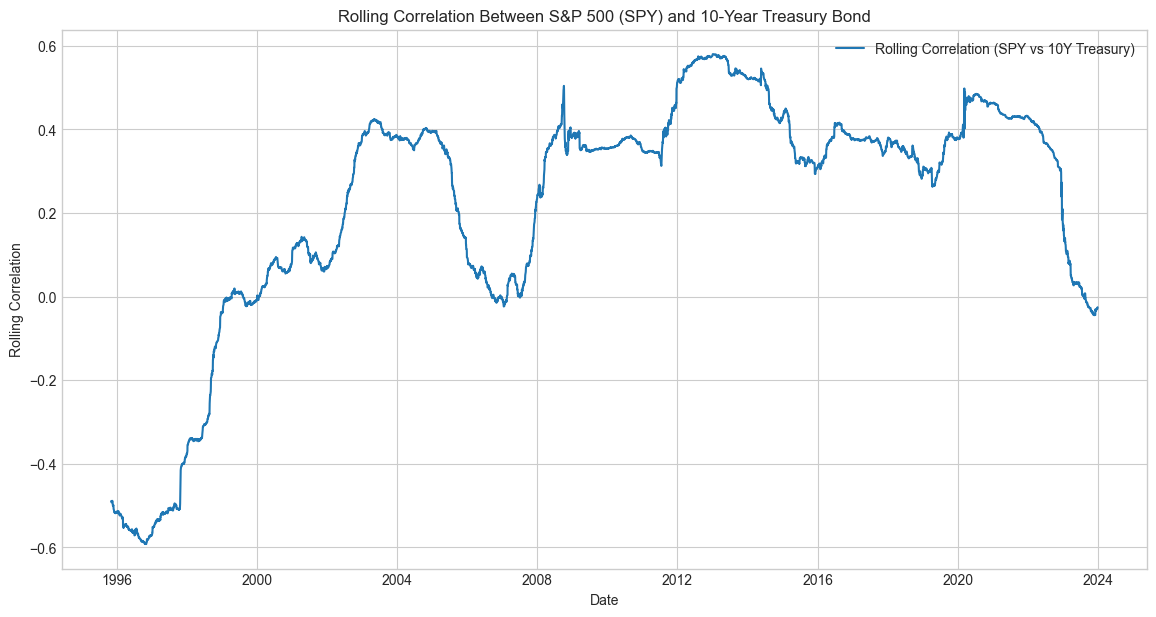

In [870]:
# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SP500'].rolling(window=700).corr(returns['10Y_Treasury'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs 10Y Treasury)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and 10-Year Treasury Bond')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  2 of 2 completed


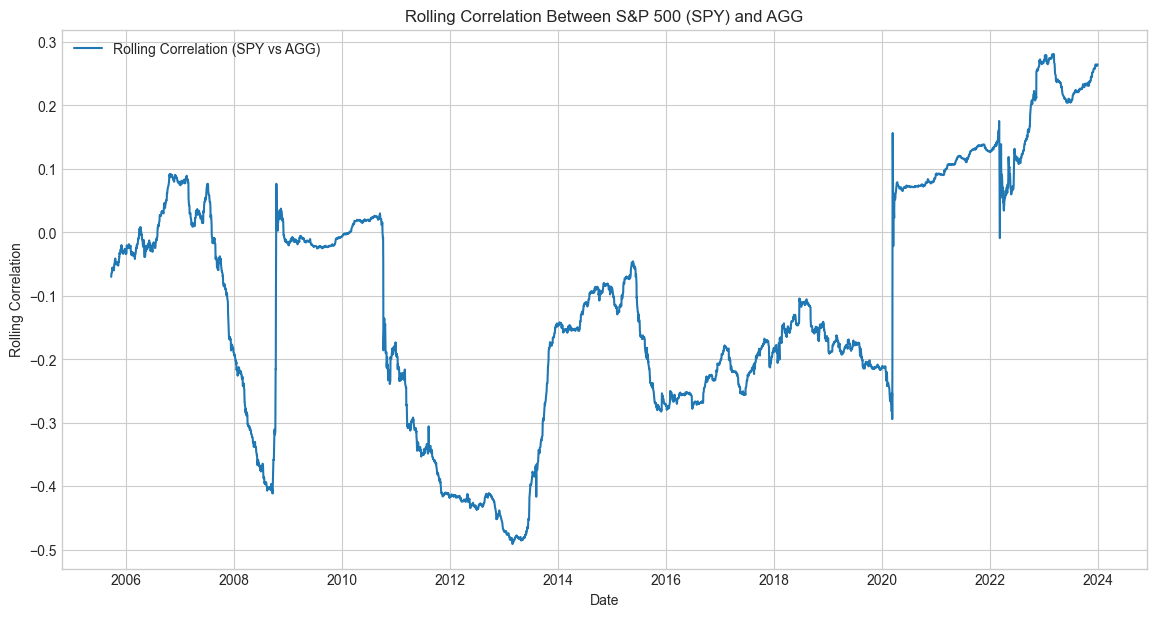

In [871]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbols for S&P 500 and AGG
tickers = ['SPY', 'AGG']

# Download historical data since 1980
data = yf.download(tickers, start='1980-01-01', end='2024-01-01')['Adj Close']

# Calculate the daily returns
returns = data.pct_change().dropna()

# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SPY'].rolling(window=500).corr(returns['AGG'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs AGG)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and AGG')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Import yfinance library
import yfinance as yf
import pandas as pd

# Define the start and end dates  
start_date = '2024-04-01'
end_date   = '2024-05-01'

# Define the list of tickers
tickers = ['AAPL', 'MSFT']

# Download historical prices for the list of tickers
historical_prices = yf.download(tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-01  169.799698  423.805573  170.029999  424.570007  171.250000   
2024-04-02  168.611298  420.681213  168.839996  421.440002  169.339996   
2024-04-03  169.420197  419.692993  169.649994  420.450012  170.679993   
2024-04-04  168.591339  417.127625  168.820007  417.880005  171.919998   
2024-04-05  169.350296  424.753845  169.580002  425.519989  170.389999   

Price                          Low                    Open              \
Ticker            MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-04-01  427.890015  169.479996  422.220001  171.190002  423.950012   
2024-04-02  422.380005  168.229996  417.839996  169.080002  420.109985   
2024-04-03  423.260010  168.580002  419.089996  168.789993  419.730011   
2024-04-04  428.670013  168.820007  417.570007  170.289993  424.989990   
2024-04-05  426.510010  168.949997  418.320007  169.589996  420.010010   

Price         Volume            
Ticker          AAPL      MSFT  
Date                            
2024-04-01  46240500  16316000  
2024-04-02  49329500  17912000  
2024-04-03  47691700  16502300  
2024-04-04  53704400  19370900  
2024-04-05  42055200  16544300

In [3]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

NameError: name 'pd' is not defined

In [5]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [6]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [7]:
new_sp500_tickers = []
for ticker in sp500_tickers:
    if '.B' not in sp500_tickers:
        new_sp500_tickers.append(ticker)
sp500_tickers = new_sp500_tickers

In [8]:
# Import yfinance library
import yfinance as yf
import pandas as pd

# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[**********            20%%                      ]  101 of 501 completed
KeyboardInterrupt

[**********            21%%                      ]  103 of 501 completed

In [49]:
# Backup to prevent having to pull again
#historical_prices_backup = historical_prices
#historical_prices = historical_prices_backup

In [53]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6120 entries, 2000-01-03 to 2024-04-30
Columns: 3006 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2652), int64(354)
memory usage: 140.4 MB


In [54]:
historical_prices.loc['2024-04-01':'2024-04-02'].head()

Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2024-04-01  145.559998  15.41  169.799698  179.087494  163.369995  111.536835   
2024-04-02  144.169998  14.40  168.611298  179.018143  160.110001  111.467178   

Price                                                      ...    Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...       WTW   
Date                                                       ...             
2024-04-01  92.309998  337.861816  502.089996  196.619995  ...  318300.0   
2024-04-02  91.489998  335.162231  499.209991  194.880005  ...  622400.0   

Price                                                                  \
Ticker           WY       WYNN      XEL       XOM        XYL      YUM   
Date                                                                    
2024-04-01  2203000  2954200.0  4266600  13817000   716800.0  2227600   
2024-04-02  3464200  1716000.0  4561600  19919600  1144400.0  1987400   

Price                                     
Ticker            ZBH    ZBRA        ZTS  
Date                                      
2024-04-01   745000.0  416900  1896500.0  
2024-04-02  1057000.0  461500  2391500.0  

[2 rows x 3006 columns]

In [55]:
historical_prices.loc['2024-04'].head()

Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2024-04-01  145.559998  15.41  169.799698  179.087494  163.369995  111.536835   
2024-04-02  144.169998  14.40  168.611298  179.018143  160.110001  111.467178   
2024-04-03  143.729996  14.16  169.420197  175.689240  159.339996  110.730835   
2024-04-04  141.339996  13.83  168.591339  166.346481  158.839996  109.566612   
2024-04-05  144.119995  13.76  169.350296  168.427063  161.770004  110.651230   

Price                                                      ...    Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...       WTW   
Date                                                       ...             
2024-04-01  92.309998  337.861816  502.089996  196.619995  ...  318300.0   
2024-04-02  91.489998  335.162231  499.209991  194.880005  ...  622400.0   
2024-04-03  92.230003  330.998383  497.010010  195.360001  ...  449700.0   
2024-04-04  91.089996  329.195343  487.109985  191.949997  ...  350800.0   
2024-04-05  94.900002  331.715607  485.119995  194.759995  ...  439700.0   

Price                                                                  \
Ticker           WY       WYNN      XEL       XOM        XYL      YUM   
Date                                                                    
2024-04-01  2203000  2954200.0  4266600  13817000   716800.0  2227600   
2024-04-02  3464200  1716000.0  4561600  19919600  1144400.0  1987400   
2024-04-03  3122100  1321500.0  4122600  16504300  1147300.0  1543800   
2024-04-04  3143500  2412000.0  7021900  18467400  1129500.0  2640400   
2024-04-05  2662500  1437600.0  4483900  21714100   753600.0  1735600   

Price                                     
Ticker            ZBH    ZBRA        ZTS  
Date                                      
2024-04-01   745000.0  416900  1896500.0  
2024-04-02  1057000.0  461500  2391500.0  
2024-04-03  1369900.0  399300  2481200.0  
2024-04-04  1032900.0  390700  4306100.0  
2024-04-05   791700.0  216700  3663900.0  

[5 rows x 3006 columns]

In [ ]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

In [ ]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()


In [ ]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100

# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

In [ ]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

In [ ]:
historical_prices

In [ ]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

[*********************100%%**********************]  500 of 501 completed

In [25]:
# Create a function called 'computingReturns' that takes  prices and a list of integers (momentums) as an input
def computingReturns(prices, list_of_momentums): 
    '''
    Takes as an input a dataframe of prices and a list of momentums 
    and returns a dataframe with returns over the momentum list and 1 day forward returns
    '''

    # Return the total returns DataFrame
    return total_returns


In [65]:
prices = historical_prices
list_of_momentums = [1,2]

In [71]:
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.613007,NaN,0.844981,NaN,NaN,8.992854,1.277778,NaN,16.274666,28.438297,...,NaN,11.505342,NaN,6.977995,18.181025,NaN,4.680300,NaN,25.027779,NaN
2000-01-04,40.281464,NaN,0.773741,NaN,NaN,8.735912,1.270833,NaN,14.909400,26.999615,...,NaN,11.073115,NaN,7.138671,17.832783,NaN,4.586221,NaN,24.666668,NaN
2000-01-05,37.782803,NaN,0.785063,NaN,NaN,8.719851,1.388889,NaN,15.204174,27.393770,...,NaN,11.659698,NaN,7.414118,18.804960,NaN,4.609742,NaN,25.138889,NaN
2000-01-06,36.344173,NaN,0.717125,NaN,NaN,9.024969,1.375000,NaN,15.328289,26.644884,...,NaN,12.205124,NaN,7.345260,19.777122,NaN,4.570541,NaN,23.777779,NaN
2000-01-07,39.372864,NaN,0.751094,NaN,NaN,9.121318,1.451389,NaN,16.072985,27.393770,...,NaN,11.803773,NaN,7.345260,19.719082,NaN,4.468628,NaN,23.513889,NaN


In [72]:
# Initialize the forecast horizon
forecast_horizon = 1
# Compute forward returns by taking percentage change of close prices
f_returns = prices.pct_change(forecast_horizon, fill_method=None)
f_returns.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.076389,NaN,-0.084310,NaN,NaN,-0.028572,-0.005435,NaN,-0.083889,-0.050590,...,NaN,-0.037568,NaN,0.023026,-0.019154,NaN,-0.020101,NaN,-0.014428,NaN
2000-01-05,-0.062030,NaN,0.014633,NaN,NaN,-0.001838,0.092897,NaN,0.019771,0.014599,...,NaN,0.052974,NaN,0.038585,0.054516,NaN,0.005129,NaN,0.019144,NaN
2000-01-06,-0.038076,NaN,-0.086538,NaN,NaN,0.034991,-0.010000,NaN,0.008163,-0.027338,...,NaN,0.046779,NaN,-0.009287,0.051697,NaN,-0.008504,NaN,-0.054144,NaN
2000-01-07,0.083334,NaN,0.047369,NaN,NaN,0.010676,0.055556,NaN,0.048583,0.028106,...,NaN,-0.032884,NaN,0.000000,-0.002935,NaN,-0.022298,NaN,-0.011098,NaN


In [73]:
f_returns[['AAPL']].head()

Ticker,AAPL
Date,
2000-01-03,NaN
2000-01-04,-0.084310
2000-01-05,0.014633
2000-01-06,-0.086538
2000-01-07,0.047369


In [74]:
prices[['AAPL']].head()

Ticker,AAPL
Date,
2000-01-03,0.844981
2000-01-04,0.773741
2000-01-05,0.785063
2000-01-06,0.717125
2000-01-07,0.751094


In [76]:
(168.611298-169.799698)/169.799698

-0.006998834591566832

In [75]:
# We then shift the forward returns
f_returns = f_returns.shift(-forecast_horizon)
f_returns.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.076389,NaN,-0.084310,NaN,NaN,-0.028572,-0.005435,NaN,-0.083889,-0.050590,...,NaN,-0.037568,NaN,0.023026,-0.019154,NaN,-0.020101,NaN,-0.014428,NaN
2000-01-04,-0.062030,NaN,0.014633,NaN,NaN,-0.001838,0.092897,NaN,0.019771,0.014599,...,NaN,0.052974,NaN,0.038585,0.054516,NaN,0.005129,NaN,0.019144,NaN
2000-01-05,-0.038076,NaN,-0.086538,NaN,NaN,0.034991,-0.010000,NaN,0.008163,-0.027338,...,NaN,0.046779,NaN,-0.009287,0.051697,NaN,-0.008504,NaN,-0.054144,NaN
2000-01-06,0.083334,NaN,0.047369,NaN,NaN,0.010676,0.055556,NaN,0.048583,0.028106,...,NaN,-0.032884,NaN,0.000000,-0.002935,NaN,-0.022298,NaN,-0.011098,NaN
2000-01-07,0.060577,NaN,-0.017588,NaN,NaN,-0.007043,0.033493,NaN,0.038610,0.087050,...,NaN,-0.004359,NaN,0.000000,-0.013981,NaN,0.040350,NaN,0.033668,NaN


In [17]:
# Pivot the dataframe
f_returns = pd.DataFrame(f_returns.unstack())
# Name the column based on the forecast horizon
name = "F_" + str(forecast_horizon) + "_d_returns"
f_returns.rename(columns={0: name}, inplace=True)
f_returns.head()

F_1_d_returns
Ticker Date                     
A      2000-01-03      -0.076389
       2000-01-04      -0.062030
       2000-01-05      -0.038076
       2000-01-06       0.083333
       2000-01-07       0.060577

In [18]:
# Initialize total_returns with forward returns
total_returns = f_returns

In [19]:
total_returns.shape

(3053880, 1)

In [20]:
list_of_momentums = [1,2]

In [21]:
# Iterate over the list of momentum values
for i in list_of_momentums:   
    # Compute returns for each momentum value
    feature = prices.pct_change(i)
    feature = pd.DataFrame(feature.unstack())
    # Name the column based on the momentum value
    name = str(i) + "_d_returns"        
    feature.rename(columns={0: name}, inplace=True)
    # Rename columns and reset index
    feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
    # Merge computed feature returns with total_returns based on Ticker and Date
    total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')

total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-03      -0.076389          NaN          NaN
       2000-01-04      -0.062030    -0.076389          NaN
       2000-01-05      -0.038076    -0.062030    -0.133680
       2000-01-06       0.083333    -0.038076    -0.097744
       2000-01-07       0.060577     0.083333     0.042084

In [22]:
# Drop rows with any NaN values
total_returns.dropna(axis=0, how='any', inplace=True) 
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05      -0.038076    -0.062030    -0.133680
       2000-01-06       0.083333    -0.038076    -0.097744
       2000-01-07       0.060577     0.083333     0.042084
       2000-01-10      -0.013599     0.060577     0.148958
       2000-01-11      -0.020221    -0.013599     0.046155

In [84]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [733]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1,2]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05        -0.0381      -0.0620      -0.1337
       2000-01-06         0.0833      -0.0381      -0.0977
       2000-01-07         0.0606       0.0833       0.0421
       2000-01-10        -0.0136       0.0606       0.1490
       2000-01-11        -0.0202      -0.0136       0.0462

In [734]:
total_returns = total_returns.filter(items=['F_1_d_returns', '1_d_returns'])
total_returns.head()

F_1_d_returns  1_d_returns
Ticker Date                                  
A      2000-01-05        -0.0381      -0.0620
       2000-01-06         0.0833      -0.0381
       2000-01-07         0.0606       0.0833
       2000-01-10        -0.0136       0.0606
       2000-01-11        -0.0202      -0.0136

In [735]:
total_returns.index.get_level_values('Ticker').nunique()

500

In [736]:
total_returns.index.get_level_values('Date').value_counts().describe()

count   6117.0000
mean     442.9537
std       44.1507
min      354.0000
25%      408.0000
50%      448.0000
75%      484.0000
max      500.0000
Name: count, dtype: float64

In [737]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

Date
2024-04-29    500
2024-04-16    500
2024-04-03    500
2024-04-04    500
2024-04-05    500
             ... 
2000-01-26    354
2000-01-27    354
2000-01-28    354
2000-01-31    354
2000-01-05    354
Name: count, Length: 6117, dtype: int64

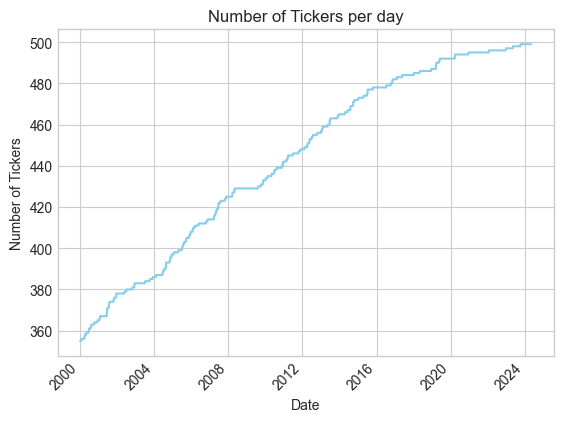

In [168]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [169]:
pd.options.display.float_format = "{:,.4f}".format

In [170]:
total_returns.describe()

,F_1_d_returns,1_d_returns
count,"2,715,627.0000","2,715,627.0000"
mean,0.0007,0.0007
std,0.0235,0.0235
min,-0.6805,-0.6805
25%,-0.0090,-0.0090
50%,0.0006,0.0006
75%,0.0102,0.0103
max,1.0236,1.0236


In [171]:
0.0007 * 252

0.1764

In [172]:
import numpy as np

In [173]:
np.sqrt(252)*  	0.0235 

0.3730509348601073

In [654]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean_bm  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns_bm = pd.DataFrame((daily_mean_bm[['F_1_d_returns']]+1).cumprod())
cum_returns_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

In [452]:
cum_returns_bm.head()

,SP&500
Date,
2000-01-05,1.005778
2000-01-06,1.032722
2000-01-07,1.042609
2000-01-10,1.032842
2000-01-11,1.030163


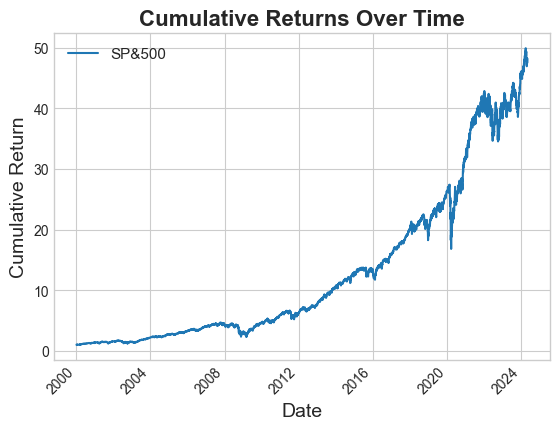

In [651]:
# Plotting the cumulative returns
cum_returns_bm.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [93]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean_bm) / 252  # Assuming 252 trading days in a year

In [657]:
ending_value    = cum_returns_bm['SP&500'].iloc[-1]
beginning_value = cum_returns_bm['SP&500'].iloc[1]

In [176]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

The CAGR is: 17.08%


In [658]:
daily_mean_bm[['SP&500']].describe()

,SP&500
count,6117.0000
mean,0.0007
std,0.0129
min,-0.1271
25%,-0.0048
50%,0.0011
75%,0.0067
max,0.1147


In [659]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [660]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.88


In [661]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean_bm[['SP&500']]+1).groupby(daily_mean_bm.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns_bm  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean_bm.index.get_level_values(0).year).last())

In [662]:
calendar_returns_bm.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date]   (SP&500)

In [ ]:
# Create a function to calculate RSI
def calculate_rsi(prices, window=14):
    
    return rsi

In [725]:
returns = total_returns[total_returns.index.get_level_values('Ticker')=='AAPL'][['1_d_returns']]
window = 6

In [726]:
delta = prices.diff()
delta.head()

1_d_returns
Ticker Date                   
A      2000-01-03          NaN
       2000-01-04      -3.3315
       2000-01-05      -2.4987
       2000-01-06      -1.4386
       2000-01-07       3.0287

In [727]:
gain = returns[returns>0].dropna().rolling(window=window).mean()
gain.rename(columns={returns.columns[0]:'gain'}, inplace=True)
gain.head(7)

gain
Ticker Date             
AAPL   2000-01-05    NaN
       2000-01-07    NaN
       2000-01-13    NaN
       2000-01-14    NaN
       2000-01-18    NaN
       2000-01-19 0.0450
       2000-01-20 0.0534

In [728]:
loss = returns[returns<0].dropna().rolling(window=window).mean()
loss.rename(columns={returns.columns[0]:'loss'}, inplace=True)
loss.head(7)

loss
Ticker Date              
AAPL   2000-01-06     NaN
       2000-01-10     NaN
       2000-01-11     NaN
       2000-01-12     NaN
       2000-01-21     NaN
       2000-01-24 -0.0467
       2000-01-26 -0.0353

In [729]:
returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
returns.head(15)

1_d_returns   gain    loss
Ticker Date                                  
AAPL   2000-01-05       0.0146    NaN     NaN
       2000-01-06      -0.0865    NaN     NaN
       2000-01-07       0.0474    NaN     NaN
       2000-01-10      -0.0176    NaN     NaN
       2000-01-11      -0.0512    NaN     NaN
       2000-01-12      -0.0600    NaN     NaN
       2000-01-13       0.1097    NaN     NaN
       2000-01-14       0.0381    NaN     NaN
       2000-01-18       0.0348    NaN     NaN
       2000-01-19       0.0253 0.0450     NaN
       2000-01-20       0.0651 0.0534     NaN
       2000-01-21      -0.0193    NaN     NaN
       2000-01-24      -0.0455    NaN -0.0467
       2000-01-25       0.0565 0.0549     NaN
       2000-01-26      -0.0184    NaN -0.0353

In [697]:
returns = returns.ffill().dropna()
returns.head()

Ticker,AAPL,gain,loss
Date,,,
2000-01-21,0.8403,0.0388,-0.0414
2000-01-24,0.8020,0.0388,-0.0359
2000-01-25,0.8473,0.0407,-0.0359
2000-01-26,0.8318,0.0407,-0.0272
2000-01-27,0.8304,0.0407,-0.0252


In [698]:
ratio = returns['gain']/abs(returns['loss'])
rsi = 100 - (100 / (1 + ratio))

In [730]:
# Create a function to calculate RSI using returns
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()    
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()    
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')    
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [716]:
# Create a function to calculate RSI using prices
def calculate_rsi(prices, window=14):    
    gain = prices[prices>0].dropna().rolling(window=window).mean()
    #gain.rename(columns={prices.columns[0]:'gain'}, inplace=True)
    gain.name = 'gain'
    loss = prices[prices<0].dropna().rolling(window=window).mean()
    #loss.rename(columns={prices.columns[0]:'loss'}, inplace=True)
    loss.name = 'loss'
    prices = pd.merge(prices, gain, left_index=True, right_index=True, how='left')
    prices = pd.merge(prices, loss, left_index=True, right_index=True, how='left')
    prices = prices.ffill()
    prices.dropna(inplace=True)
    ratio = prices['gain']/abs(prices['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [717]:
prices = pd.DataFrame(historical_prices.unstack())
prices.rename(columns={0:'1_d_returns'}, inplace=True)
prices.head()

1_d_returns
Ticker Date                   
A      2000-01-03      43.6130
       2000-01-04      40.2815
       2000-01-05      37.7828
       2000-01-06      36.3442
       2000-01-07      39.3729

In [740]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [741]:
total_returns[['RSI']].describe()

,RSI
count,2692758.0000
mean,50.9748
std,8.4170
min,8.0071
25%,45.2498
50%,50.9506
75%,56.6624
max,89.2620


In [625]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


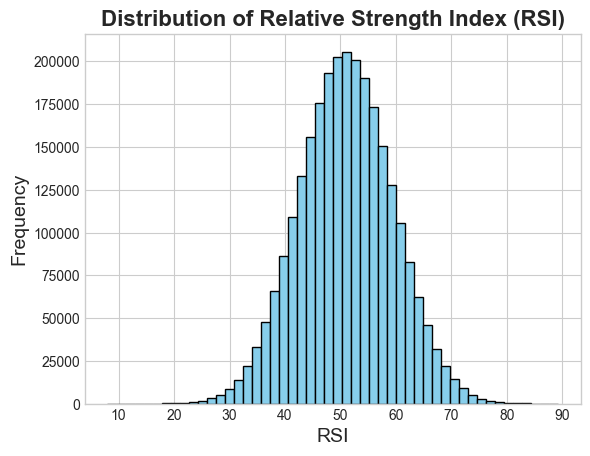

In [742]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Turn off gridlines for histograms

# Displaying the plot
plt.show()

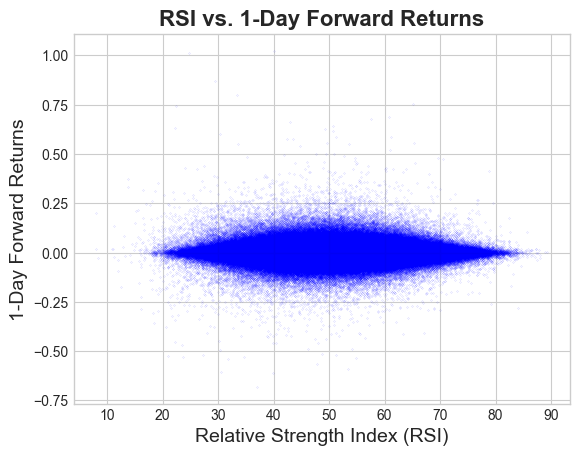

In [743]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)

# Displaying the plot
#plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [744]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

,F_1_d_returns,RSI
F_1_d_returns,1.000000,-0.004193
RSI,-0.004193,1.000000


<Axes: xlabel='Quantiles'>

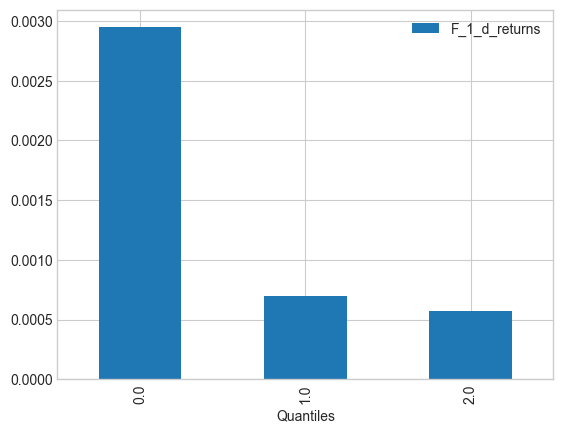

In [745]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

In [631]:
total_returns[total_returns['RSI']<30].describe()

,F_1_d_returns,1_d_returns,RSI,Quantiles,Position,Realized_Ret,RSI_Return
count,15909.0000,15909.0000,15909.0000,15909.0000,15909.0000,15909.0000,15909.0000
mean,0.0029,-0.0153,27.2697,0.0000,1.0000,0.0029,0.0029
std,0.0442,0.0491,2.5304,0.0000,0.0000,0.0442,0.0442
min,-0.5314,-0.6805,8.0071,0.0000,1.0000,-0.5314,-0.5314
25%,-0.0102,-0.0203,26.1460,0.0000,1.0000,-0.0102,-0.0102
50%,0.0014,-0.0021,28.0188,0.0000,1.0000,0.0014,0.0014
75%,0.0136,0.0055,29.1698,0.0000,1.0000,0.0136,0.0136
max,1.0101,0.3510,29.9995,0.0000,1.0000,1.0101,1.0101


In [787]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns['RSI'].transform(trading_strategy)
# Create Returns for each Trade
total_returns['RSI_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 



In [788]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean_RSI  = pd.DataFrame(total_returns.loc[:,'RSI_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns_RSI = pd.DataFrame((daily_mean_RSI[['RSI_Return']]+1).cumprod())

In [789]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean_RSI) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns_RSI['RSI_Return'].iloc[-1]
beginning_value = cum_returns_RSI['RSI_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

The CAGR is: 0.43%


In [752]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean_RSI  = daily_mean_RSI[['RSI_Return']].describe().iloc[1,:] * 252
std_RSI   = daily_mean_RSI[['RSI_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean_RSI/std_RSI

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.37


In [759]:
total_returns.shape

(2709548, 6)

In [760]:
15909.0000/2709548

0.00587145900349431

In [756]:
total_returns[total_returns['Position']==1][['F_1_d_returns']].describe()

,F_1_d_returns
count,15909.0000
mean,0.0029
std,0.0442
min,-0.5314
25%,-0.0102
50%,0.0014
75%,0.0136
max,1.0101


In [635]:
trades = total_returns[total_returns['Position']==1]
tickers_per_date =trades.index.get_level_values('Date').value_counts()
tickers_per_date.describe()

count   4559.0000
mean       3.4896
std        5.1156
min        1.0000
25%        1.0000
50%        2.0000
75%        4.0000
max      110.0000
Name: count, dtype: float64

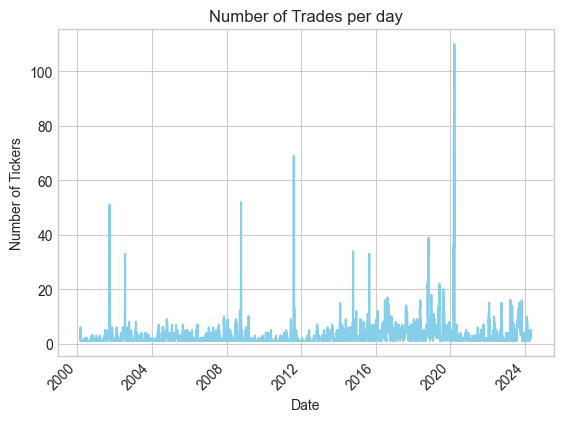

In [636]:
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Trades per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Date'>

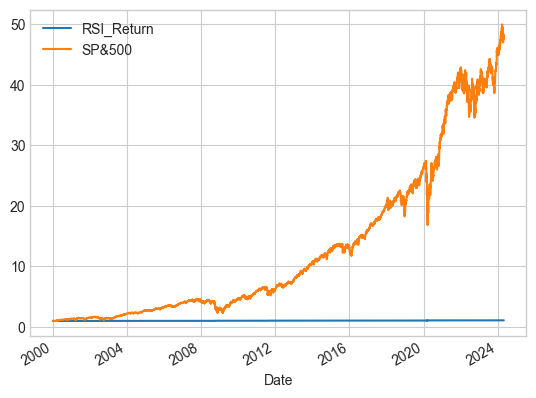

In [762]:
cum_returns = pd.merge(cum_returns_RSI, cum_returns_bm, left_index=True, right_index=True)
cum_returns.plot()

In [763]:
ann_returns = (pd.DataFrame((daily_mean_RSI[['RSI_Return']]+1).groupby(daily_mean_RSI.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns_RSI  = pd.DataFrame(ann_returns['RSI_Return'].groupby(daily_mean_RSI.index.get_level_values(0).year).last())
all_returns = pd.merge(calendar_returns_RSI,calendar_returns_bm, left_index=True, right_index=True)
all_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)

In [775]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_data['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_data['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()


In [776]:
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

,Metric,Value
0,Accuracy,0.4866
1,Precision,0.5300
2,Recall,0.0061


In [779]:
# Count the number of each class
counts = total_returns['y_test'].value_counts()

# Calculate the share of each class
total = counts.sum()
shares = counts / total * 100
shares

y_test
1   51.3791
0   48.6209
Name: count, dtype: float64

In [812]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 60:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns['RSI'].transform(trading_strategy)
# Create Returns for each Trade
total_returns['RSI_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 


In [2]:
total_returns.head()

NameError: name 'total_returns' is not defined

In [814]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean_RSI  = pd.DataFrame(total_returns.loc[:,'RSI_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns_RSI = pd.DataFrame((daily_mean_RSI[['RSI_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean_RSI) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns_RSI['RSI_Return'].iloc[-1]
beginning_value = cum_returns_RSI['RSI_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

The CAGR is: 14.98%


In [815]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean_RSI  = daily_mean_RSI[['RSI_Return']].describe().iloc[1,:] * 252
std_RSI   = daily_mean_RSI[['RSI_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean_RSI/std_RSI

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.84


<Axes: xlabel='Date'>

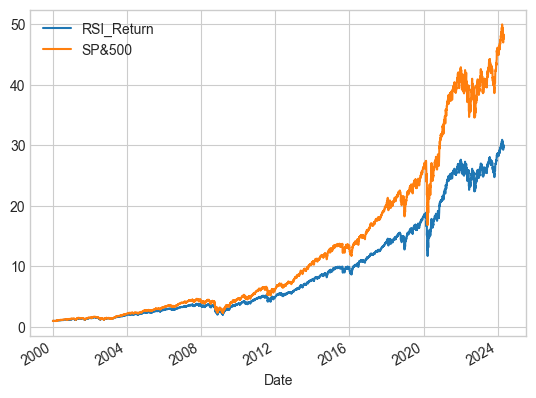

In [816]:
cum_returns = pd.merge(cum_returns_RSI, cum_returns_bm, left_index=True, right_index=True)
cum_returns.plot()

In [817]:
ann_returns = (pd.DataFrame((daily_mean_RSI[['RSI_Return']]+1).groupby(daily_mean_RSI.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns_RSI  = pd.DataFrame(ann_returns['RSI_Return'].groupby(daily_mean_RSI.index.get_level_values(0).year).last())
all_returns = pd.merge(calendar_returns_RSI,calendar_returns_bm, left_index=True, right_index=True)
all_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)

In [818]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Quantiles  Position  \
Ticker Date                                                               
A      2000-01-05        -0.0381      -0.0620  NaN        NaN         0   
       2000-01-06         0.0833      -0.0381  NaN        NaN         0   
       2000-01-07         0.0606       0.0833  NaN        NaN         0   
       2000-01-10        -0.0136       0.0606  NaN        NaN         0   
       2000-01-11        -0.0202      -0.0136  NaN        NaN         0   

                   RSI_Return  y  y_pred  y_test  
Ticker Date                                       
A      2000-01-05     -0.0000  0       0       0  
       2000-01-06      0.0000  1       0       1  
       2000-01-07      0.0000  1       0       1  
       2000-01-10     -0.0000  0       0       0  
       2000-01-11     -0.0000  0       0       0

In [829]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_returns['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_returns['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

,Metric,Value
0,Accuracy,0.5125
1,Precision,0.5154
2,Recall,0.8541
